In [1]:
include("PVCR.jl");

┌ Warning: `@pyimport foo` is deprecated in favor of `foo = pyimport("foo")`.
│   caller = _pywrap_pyimport(::PyObject) at PyCall.jl:407
└ @ PyCall /Users/arnavgautam/.julia/packages/PyCall/ttONZ/src/PyCall.jl:407
┌ Warning: `getindex(o::PyObject, s::AbstractString)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o."s"` instead of `o["s"]`.
│   caller = get_nsrdb_sam_df() at retrieve_nsrdb_data.jl:92
└ @ Main /Users/arnavgautam/Documents/Research/Jose_Daniel_Lara/arnav_PVCR/functions/retrieve_nsrdb_data.jl:92
┌ Warning: `getindex(o::PyObject, s::AbstractString)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o."s"` instead of `o["s"]`.
│   caller = #get_nsrdb_sam_pv_output#73(::Bool, ::Function) at retrieve_nsrdb_data.jl:100
└ @ Main /Users/arnavgautam/Documents/Research/Jose_Daniel_Lara/arnav_PVCR/functions/retrieve_nsrdb_data.jl:100


 0.00 %  @ 0
 0.67 %  @ 175
 1.34 %  @ 350
 2.00 %  @ 525
 2.67 %  @ 700
 3.33 %  @ 875
 4.00 %  @ 1050
 4.67 %  @ 1225
 5.33 %  @ 1400
 6.00 %  @ 1575
 6.66 %  @ 1750
 7.33 %  @ 1925
 7.99 %  @ 2100
 8.66 %  @ 2275
 9.33 %  @ 2450
 9.99 %  @ 2625
10.66 %  @ 2800
11.32 %  @ 2975
11.99 %  @ 3150
12.66 %  @ 3325
13.32 %  @ 3500
13.99 %  @ 3675
14.65 %  @ 3850
15.32 %  @ 4025
15.99 %  @ 4200
16.65 %  @ 4375
17.32 %  @ 4550
17.98 %  @ 4725
18.65 %  @ 4900
19.32 %  @ 5075
19.98 %  @ 5250
20.65 %  @ 5425
21.31 %  @ 5600
21.98 %  @ 5775
22.64 %  @ 5950
23.31 %  @ 6125
23.98 %  @ 6300
24.64 %  @ 6475
25.31 %  @ 6650
25.97 %  @ 6825
26.64 %  @ 7000
27.31 %  @ 7175
27.97 %  @ 7350
28.64 %  @ 7525
29.30 %  @ 7700
29.97 %  @ 7875
30.64 %  @ 8050
31.30 %  @ 8225
31.97 %  @ 8400
32.63 %  @ 8575
33.30 %  @ 8750


# Residential cases

## Residential Case 1: Small PV System, this doesn't generate any injection into the grid

In [2]:
PVRes.capacity = 0.0
base_ebalance = annual_energy_balance(cnfl_residential, PVRes, print_output=false);
PVRes.capacity = 1.0
ts=simulate(cnfl_residential, PVRes, 3);

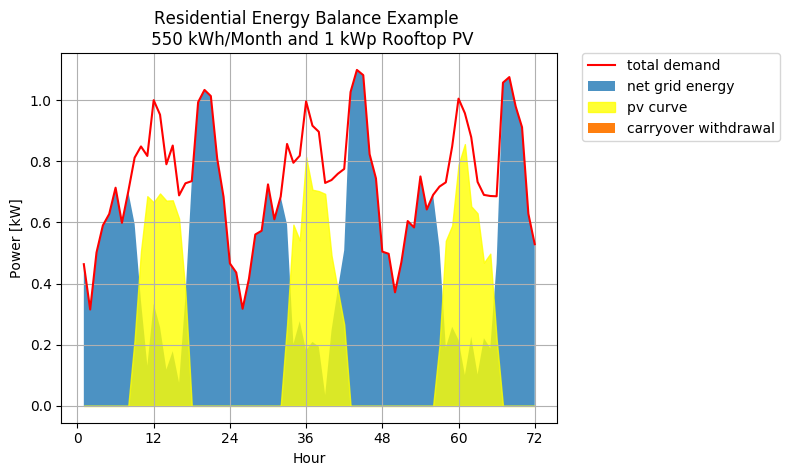

In [3]:
hours = 1:72
fill_between(hours, ts["injection_grid_h"], label = "net grid energy", alpha = 0.8)
fill_between(hours, ts["pv_curve"], label = "pv curve", alpha = 0.8, color="yellow")
fill_between(hours, ts["withdrawal_h"],  label = "carryover withdrawal")
plot(hours, ts["demand_curve"], label = "total demand", color = "red")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
xlabel("Hour")
ylabel("Power [kW]")
grid("on")
xticks([0,12,24,36,48,60,72]);
title("Residential Energy Balance Example \n 550 kWh/Month and 1 kWp Rooftop PV");

### Energy Balance for case residential 1

In [4]:
ebalance = annual_energy_balance(cnfl_residential, PVRes, print_output=true);

month consumer_energy PV_energy injection_grid grid_energy global_allowance allowance withdrawn_energy utility_supplied_energy carryover peak_power peak_demand
1 545.84 173.01 0.0 372.83 84.78 0.0 0.0 372.83 0.0 1.19 1.19
2 545.41 110.61 0.0 434.81 138.97 0.0 0.0 434.81 0.0 1.31 1.31
3 553.57 107.01 0.0 446.56 191.41 0.0 0.0 446.56 0.0 1.19 1.19
4 540.57 112.91 0.0 427.66 246.73 0.0 0.0 427.66 0.0 1.21 1.21
5 553.89 122.68 0.22 431.43 306.85 0.22 0.22 431.21 0.0 1.21 1.21
6 555.82 114.83 0.0 440.99 362.9 0.0 0.0 440.99 0.0 1.24 1.24
7 538.6 115.27 0.0 423.32 419.38 0.0 0.0 423.32 0.0 1.16 1.16
8 547.16 121.55 0.0 425.61 478.94 0.0 0.0 425.61 0.0 1.19 1.19
9 536.94 120.22 0.13 416.85 537.85 0.13 0.13 416.72 0.0 1.19 1.19
10 559.76 125.78 0.0 433.98 599.35 0.0 0.0 433.98 0.0 1.21 1.21
11 557.76 95.31 0.0 462.45 646.06 0.0 0.0 462.45 0.0 1.24 1.24
12 558.25 129.02 0.0 429.23 709.28 0.0 0.0 429.23 0.0 1.21 1.21


### Billings case residential 1

In [5]:
bills_residential = Dict();  base_bills_residential = Dict()
println("grid_cost"," ","withdrawn_energy_cost"," ", "demand_charge", " ", "total_cost", " | ", "counterfactual_cost", " ", "savings")
for m in 1:12
    bills_residential[m] = monthly_bill(ebalance[m], cnfl_residential, print_output=true)
    base_bills_residential[m] = monthly_bill(base_ebalance[m], cnfl_residential, print_output=false)
end

grid_cost withdrawn_energy_cost demand_charge total_cost | counterfactual_cost savings
48979.99 0.0 0.0 57513.17  | 78001.33 20488.16
55186.5 0.0 0.0 64852.68  | 77950.66 13097.97
56363.32 0.0 0.0 66244.33  | 78916.91 12672.58
54471.02 0.0 0.0 64006.58  | 77377.26 13370.67
54826.68 4.53 0.0 64433.13  | 78954.65 14521.52
55805.64 0.0 0.0 65584.85  | 79183.03 13598.18
54036.62 0.0 0.0 63492.88  | 77143.6 13650.71
54265.57 0.0 0.0 63763.63  | 78157.75 14394.12
53375.47 2.66 0.0 62714.55  | 76947.47 14232.92
55103.83 0.0 0.0 64754.92  | 79650.26 14895.34
57954.65 0.0 0.0 68126.16  | 79412.85 11286.69
54628.48 0.0 0.0 64192.8  | 79471.18 15278.38


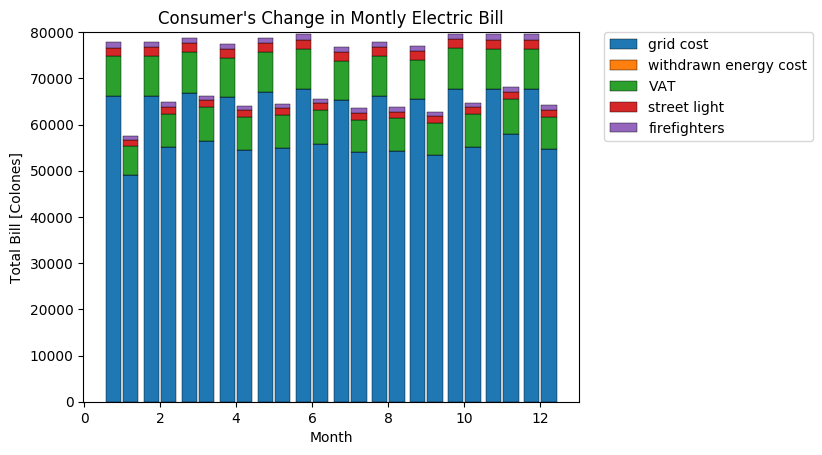

In [6]:
plot_bill(base_bills_residential, bills_residential, ["grid_cost", "withdrawn_energy_cost", "VAT", "street_light", "firefighters"]);

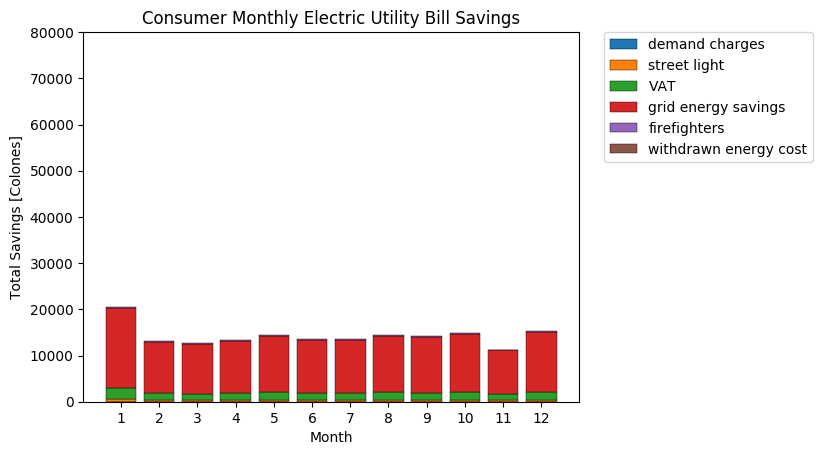

In [7]:
plot_savings(bills_residential);

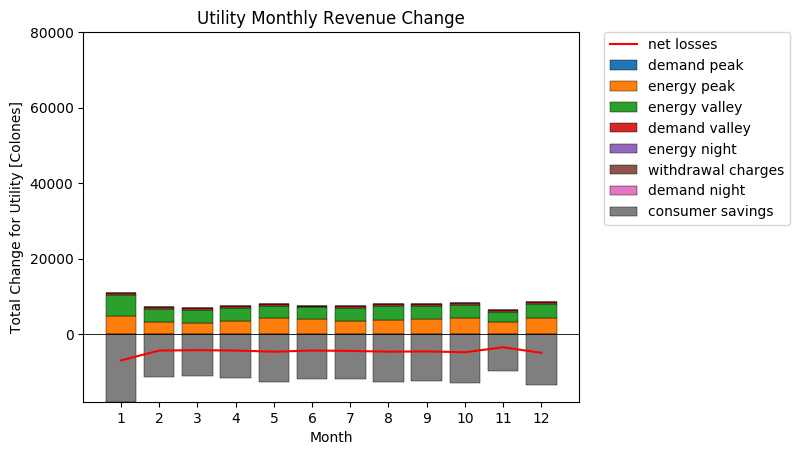

In [8]:
plot_utility_change(bills_residential);

## Residential Case 2: Medium Size PV System, produces some injection into the grid 

In [9]:
PVRes.capacity = 2.0
ts=simulate(cnfl_residential, PVRes, 3);

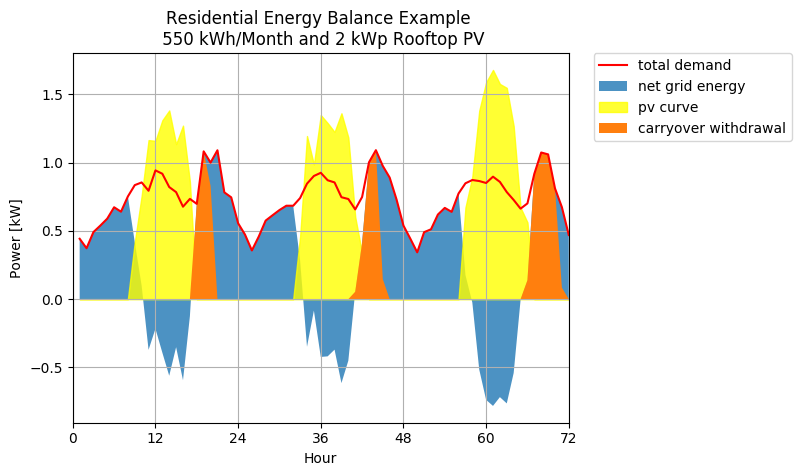

In [10]:
hours = 1:72
fill_between(hours, ts["injection_grid_h"], label = "net grid energy", alpha = 0.8)
fill_between(hours, ts["pv_curve"], label = "pv curve", alpha = 0.8, color="yellow")
fill_between(hours, ts["withdrawal_h"],  label = "carryover withdrawal")
plot(hours, ts["demand_curve"], label = "total demand", color = "red")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
xlabel("Hour")
xlim(1,72)
ylabel("Power [kW]")
grid("on")
xticks([0,12,24,36,48,60,72]);
title("Residential Energy Balance Example \n 550 kWh/Month and 2 kWp Rooftop PV");

### Energy Balance for case residential 2

In [11]:
ebalance = annual_energy_balance(cnfl_residential, PVRes, print_output=true);

month consumer_energy PV_energy injection_grid grid_energy global_allowance allowance withdrawn_energy utility_supplied_energy carryover peak_power peak_demand
1 545.69 301.42 66.71 310.98 147.7 66.71 66.71 244.27 0.0 1.18 1.18
2 547.61 176.71 14.49 385.39 167.58 14.49 14.49 370.89 0.0 1.29 1.29
3 552.5 215.55 39.16 376.11 258.7 39.16 39.16 336.95 0.0 1.19 1.19
4 539.52 210.17 45.21 374.57 322.53 45.21 45.21 329.35 0.0 1.19 1.19
5 553.31 233.43 43.12 363.0 391.69 43.12 43.12 319.88 0.0 1.2 1.2
6 555.09 215.47 35.16 374.78 454.15 35.16 35.16 339.62 0.0 1.21 1.21
7 537.38 212.27 43.21 368.33 523.01 43.21 43.21 325.11 0.0 1.17 1.17
8 546.17 244.17 50.84 352.84 599.44 50.84 50.84 302.0 0.0 1.19 1.19
9 536.84 220.89 46.77 362.71 656.84 46.77 46.77 315.94 0.0 1.21 1.21
10 558.15 226.62 37.84 369.36 721.12 37.84 37.84 331.53 0.0 1.21 1.21
11 558.41 227.16 44.85 376.1 794.59 44.85 44.85 331.25 0.0 1.25 1.25
12 559.55 225.99 42.56 376.12 860.47 42.56 42.56 333.56 0.0 1.21 1.21


### Billings case residential 2

In [12]:
bills_residential = Dict()
println("grid_cost"," ","withdrawn_energy_cost"," ", "demand_charge", " ", "total_cost", " | ", "counterfactual_cost", " ", "savings")
for m in 1:12
    bills_residential[m] = monthly_bill(ebalance[m], cnfl_residential, print_output=true)
end

grid_cost withdrawn_energy_cost demand_charge total_cost | counterfactual_cost savings
16914.85 1402.84 0.0 22111.1  | 77984.17 55873.07
48786.28 304.8 0.0 57684.73  | 78210.69 20525.96
45387.54 823.55 0.0 54347.38  | 78790.09 24442.71
44626.47 950.83 0.0 53614.67  | 77253.09 23638.42
43677.98 906.83 0.0 52435.22  | 78886.22 26451.0
45654.56 739.32 0.0 54552.45  | 79096.22 24543.77
44201.75 908.78 0.0 53057.16  | 76999.63 23942.47
41887.39 1069.07 0.0 50530.99  | 78040.73 27509.74
43283.55 983.47 0.0 52069.52  | 76935.24 24865.72
44843.97 795.7 0.0 53667.98  | 79458.66 25790.68
44816.49 943.21 0.0 53829.37  | 79490.26 25660.89
45047.52 895.03 0.0 54039.25  | 79624.6 25585.36


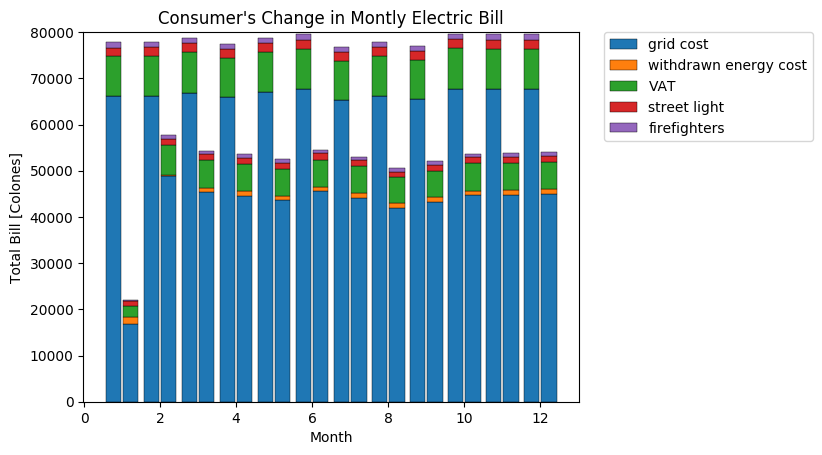

In [13]:
plot_bill(base_bills_residential, bills_residential, ["grid_cost", "withdrawn_energy_cost", "VAT", "street_light", "firefighters"]);

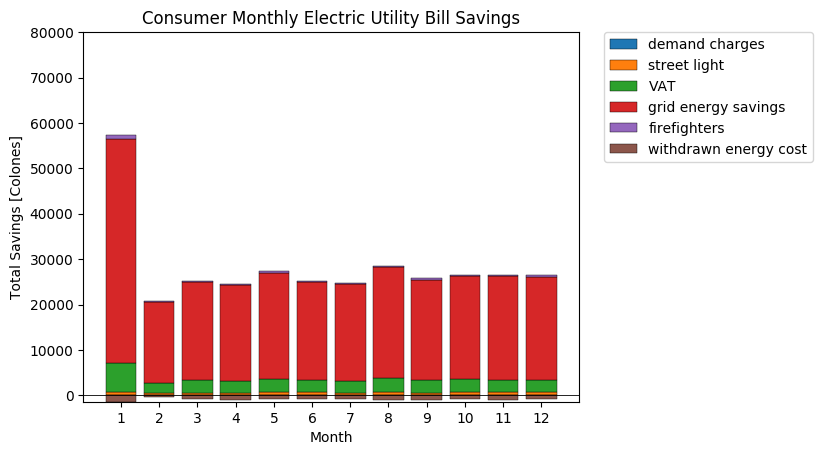

In [14]:
plot_savings(bills_residential);

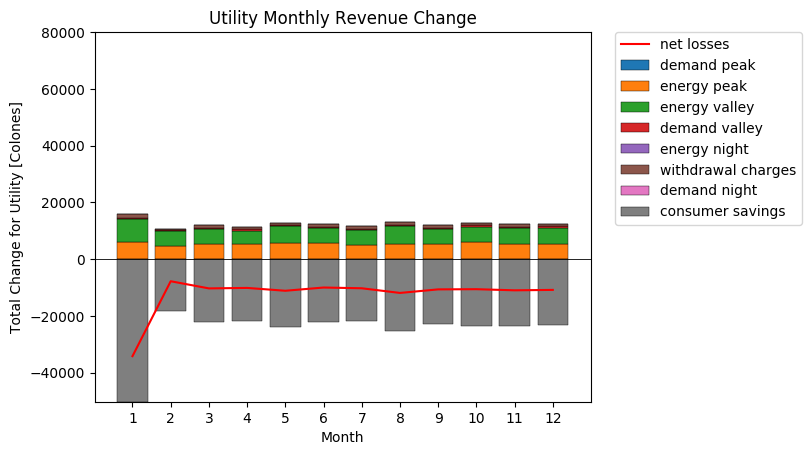

In [15]:
plot_utility_change(bills_residential);

## Residential Case 3: Large PV System that generates multi-day carry over

In [16]:
PVRes.capacity = 4.0
ts=simulate(cnfl_residential, PVRes, 3);

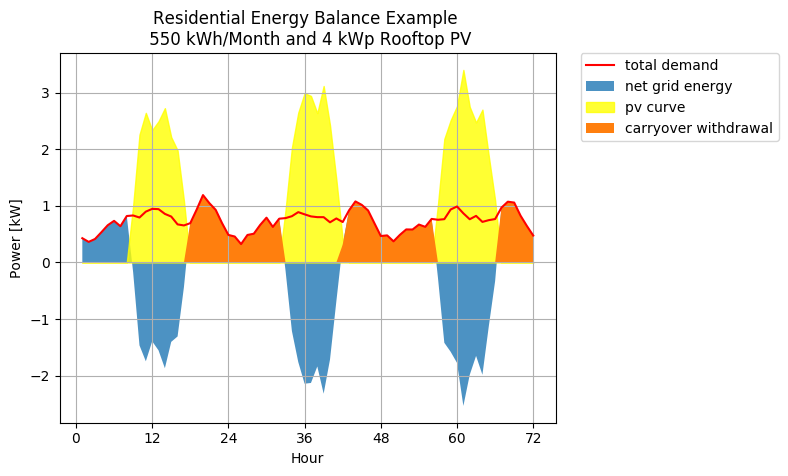

In [17]:
hours = 1:72
fill_between(hours, ts["injection_grid_h"], label = "net grid energy", alpha = 0.8)
fill_between(hours, ts["pv_curve"], label = "pv curve", alpha = 0.8, color="yellow")
fill_between(hours, ts["withdrawal_h"],  label = "carryover withdrawal")
plot(hours, ts["demand_curve"], label = "total demand", color = "red")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
xlabel("Hour")
ylabel("Power [kW]")
grid("on")
xticks([0,12,24,36,48,60,72]);
title("Residential Energy Balance Example \n 550 kWh/Month and 4 kWp Rooftop PV");

### Energy Balance for case residential 3

In [18]:
ebalance = annual_energy_balance(cnfl_residential, PVRes, print_output=true);

month consumer_energy PV_energy injection_grid grid_energy global_allowance allowance withdrawn_energy utility_supplied_energy carryover peak_power peak_demand
1 546.58 666.47 419.08 299.19 326.57 326.57 299.19 0.0 27.38 1.18 1.18
2 545.92 370.51 180.62 356.04 208.93 208.0 208.0 148.03 0.0 1.3 1.3
3 554.93 482.82 260.02 332.14 237.5 237.5 237.5 72.11 0.0 1.2 1.2
4 540.77 480.97 261.54 321.34 235.68 235.68 235.68 59.8 0.0 1.21 1.21
5 554.77 451.8 234.18 337.15 221.38 221.38 221.38 102.97 0.0 1.21 1.21
6 559.05 449.1 241.32 351.28 220.06 220.06 220.06 109.95 0.0 1.23 1.23
7 539.19 481.15 262.06 320.11 235.76 235.76 235.76 58.05 0.0 1.16 1.16
8 547.52 540.63 301.28 308.17 264.91 264.91 264.91 6.89 0.0 1.19 1.19
9 539.49 476.99 255.28 317.78 233.73 233.73 233.73 62.5 0.0 1.2 1.2
10 557.92 494.53 283.7 347.09 242.32 242.32 242.32 63.39 0.0 1.21 1.21
11 558.46 493.68 269.36 334.13 241.9 241.9 241.9 64.78 0.0 1.25 1.25
12 559.94 502.47 286.65 344.12 246.21 246.21 246.21 57.47 0.0 1.2 1.2


### Billings case residential 3

In [19]:
bills_residential = Dict()
println("grid_cost"," ","withdrawn_energy_cost"," ", "demand_charge", " ", "total_cost", " | ", "counterfactual_cost", " ", "savings")
for m in 1:12
    bills_residential[m] = monthly_bill(ebalance[m], cnfl_residential, print_output=true)
end

grid_cost withdrawn_energy_cost demand_charge total_cost | counterfactual_cost savings
1893.9 6291.91 0.0 8270.12  | 78088.51 69818.39
9345.39 4374.33 0.0 16993.07  | 78010.94 61017.87
4552.49 4994.71 0.0 12121.22  | 79077.71 66956.49
3775.12 4956.27 0.0 11147.16  | 77401.07 66253.91
6500.37 4655.67 0.0 13984.96  | 79058.74 65073.78
6941.37 4627.81 0.0 14508.63  | 79565.81 65057.18
3664.59 4958.06 0.0 11018.07  | 77214.31 66196.24
434.93 5571.05 0.0 7973.53  | 78200.48 70226.95
3945.46 4915.29 0.0 11283.1  | 77249.62 65966.53
4001.78 5095.94 0.0 11657.91  | 79431.38 67773.47
4089.31 5087.22 0.0 11702.87  | 79495.25 67792.38
3628.06 5177.82 0.0 11312.6  | 79671.21 68358.61


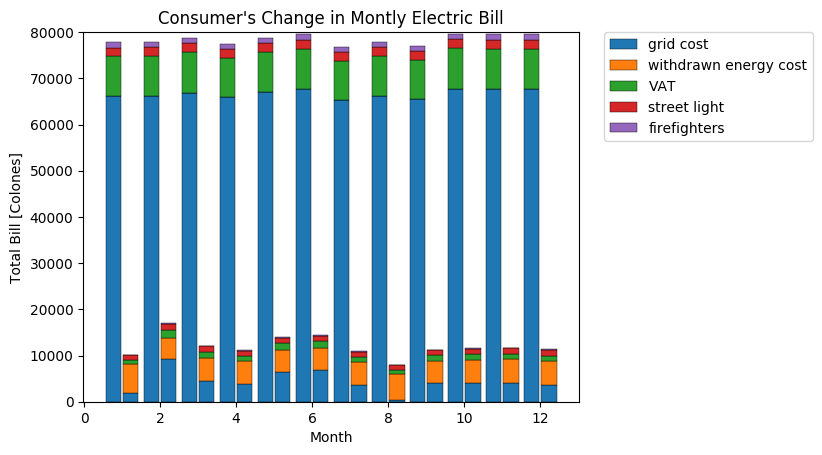

In [20]:
plot_bill(base_bills_residential, bills_residential, ["grid_cost", "withdrawn_energy_cost", "VAT", "street_light", "firefighters"]);

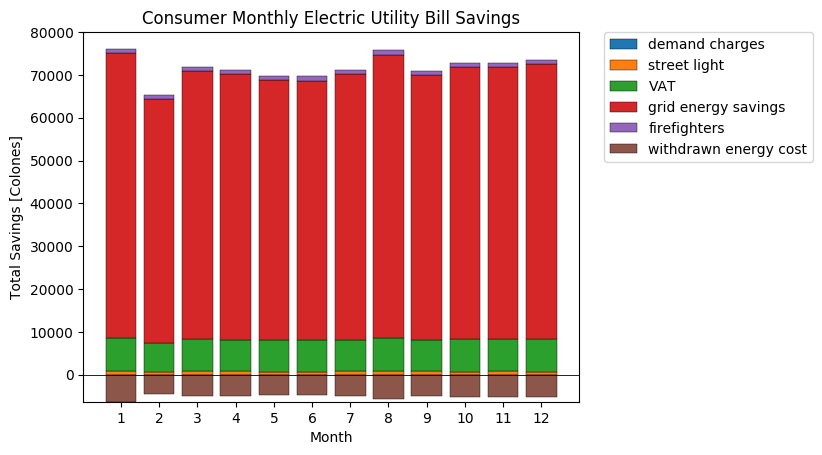

In [21]:
plot_savings(bills_residential);

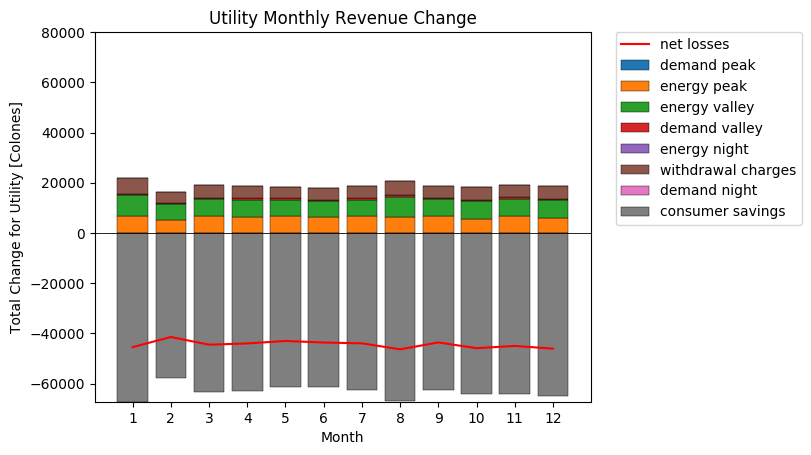

In [22]:
plot_utility_change(bills_residential);

# Commercial consumer subject to commercial and small size industrial tariff cases

## Commercial case1: small PV system

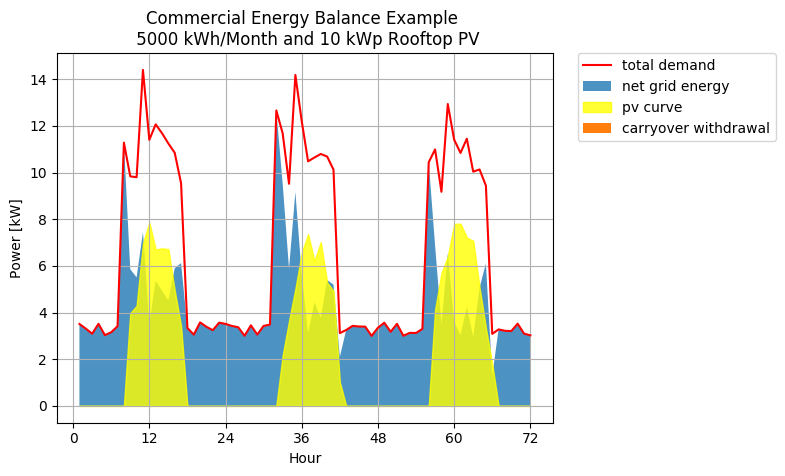

PyObject Text(0.5, 1, 'Commercial Energy Balance Example \n 5000 kWh/Month and 10 kWp Rooftop PV')

In [23]:
PVComInd.capacity = 0.0
base_ebalance = annual_energy_balance(cnfl_commercial, PVComInd, print_output=false);
PVComInd.capacity = 10.0
ts=simulate(cnfl_commercial, PVComInd, 3);
fill_between(hours, ts["injection_grid_h"], label = "net grid energy", alpha = 0.8)
fill_between(hours, ts["pv_curve"], label = "pv curve", alpha = 0.8, color="yellow")
fill_between(hours, ts["withdrawal_h"],  label = "carryover withdrawal")
plot(hours, ts["demand_curve"], label = "total demand", color = "red")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
xlabel("Hour")
ylabel("Power [kW]")
grid("on")
xticks([0,12,24,36,48,60,72]);
title("Commercial Energy Balance Example \n 5000 kWh/Month and 10 kWp Rooftop PV")

In [24]:
ebalance = annual_energy_balance(cnfl_commercial, PVComInd, print_output=true);

month consumer_energy PV_energy injection_grid grid_energy global_allowance allowance withdrawn_energy utility_supplied_energy carryover peak_power peak_demand
1 5014.26 1482.29 0.0 3531.97 726.32 0.0 0.0 3531.97 0.0 14.9 11.37
2 5098.06 1001.29 0.0 4096.77 1216.95 0.0 0.0 4096.77 0.0 16.87 13.81
3 4846.76 1171.79 0.0 3674.97 1791.13 0.0 0.0 3674.97 0.0 14.5 11.65
4 5037.05 1095.17 0.0 3941.88 2327.76 0.0 0.0 3941.88 0.0 15.41 12.54
5 5339.44 1107.48 0.0 4231.96 2870.43 0.0 0.0 4231.96 0.0 15.94 12.99
6 5200.94 1034.47 0.0 4166.48 3377.31 0.0 0.0 4166.48 0.0 16.01 12.94
7 4966.31 1132.78 0.0 3833.54 3932.37 0.0 0.0 3833.54 0.0 14.81 11.94
8 4997.69 1355.25 0.0 3642.43 4596.45 0.0 0.0 3642.43 0.0 14.55 10.36
9 4905.56 1108.59 0.0 3796.97 5139.65 0.0 0.0 3796.97 0.0 15.03 12.17
10 4734.95 1104.2 0.0 3630.75 5680.71 0.0 0.0 3630.75 0.0 14.11 11.47
11 4919.09 1127.08 0.0 3792.01 6232.98 0.0 0.0 3792.01 0.0 14.94 12.2
12 4860.43 1228.76 0.0 3631.67 6835.08 0.0 0.0 3631.67 0.0 14.39 11.74


In [25]:
bills_commercial = Dict()
base_bills_commercial = Dict()
println("grid_cost"," ","withdrawn_energy_cost"," ", "total_energy_cost", " ", "total_demand_charges", " | ", 
        "counterfactual_energy_cost", " ", "counterfactual_demand_cost", " ", "counterfactual_cost", " ", " | ", "savings")
for m in 1:12
    bills_commercial[m] = monthly_bill(ebalance[m], cnfl_commercial, print_output=true)
    base_bills_commercial[m] = monthly_bill(base_ebalance[m], cnfl_commercial, print_output=false)
end

grid_cost withdrawn_energy_cost total_energy_cost total_demand_charges | counterfactual_energy_cost counterfactual_demand_cost counterfactual_cost  | savings
226823.43 0.0 114273.48 403805.94  | 322015.89 149797.4 559005.82  | 155199.88
263094.63 0.0 138810.67 475566.0  | 327397.22 169632.32 588235.57  | 112669.57
236006.62 0.0 117087.09 418074.18  | 311258.69 145778.51 541462.3  | 123388.12
253147.47 0.0 126076.58 448995.6  | 323479.35 154909.92 566631.74  | 117636.14
271776.4 0.0 130559.36 476534.47  | 342898.92 160214.09 596063.61  | 119529.14
267571.17 0.0 130108.19 470961.4  | 334004.63 160991.07 586262.87  | 115301.48
246189.78 0.0 120008.81 433668.6  | 318936.62 148870.2 554240.08  | 120571.49
233917.17 0.0 104182.19 400753.96  | 320951.33 146233.73 553636.73  | 152882.77
243841.32 0.0 122367.13 433551.56  | 315034.81 151064.23 552067.15  | 118515.59
233166.53 0.0 115320.75 412633.07  | 304078.42 141816.14 528283.68  | 115650.61
243522.75 0.0 122693.87 433543.53  | 315904.03 150

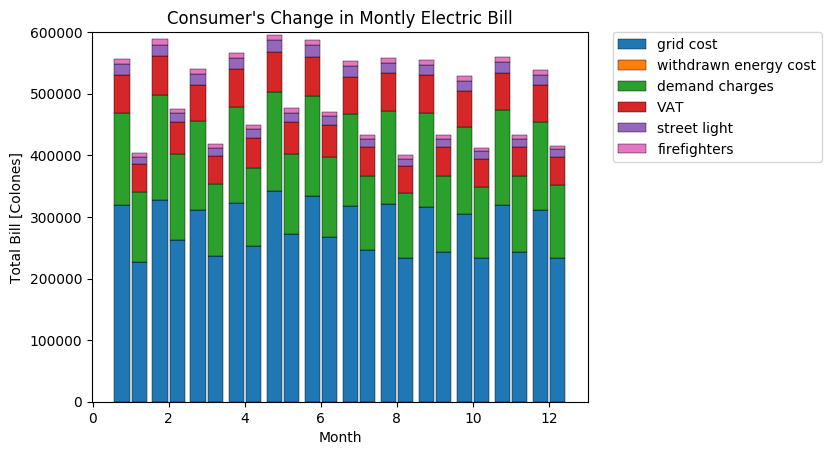

In [26]:
plot_bill(base_bills_commercial, bills_commercial, ["grid_cost", "withdrawn_energy_cost", "demand_charges", "VAT", "street_light", "firefighters"]);

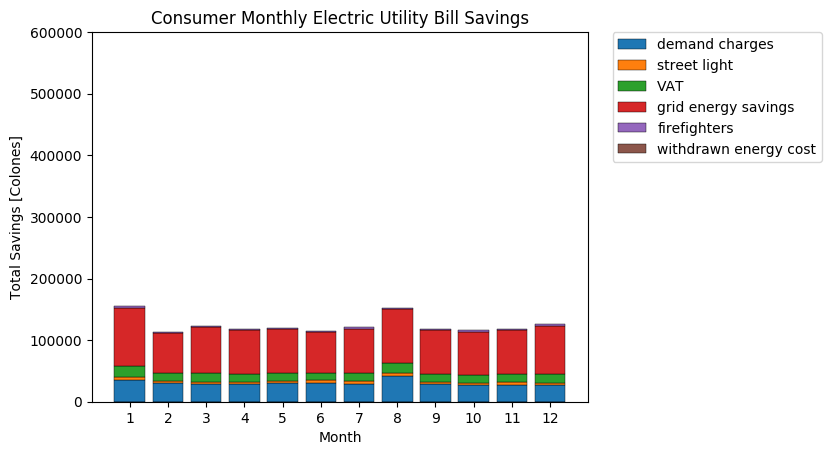

In [27]:
plot_savings(bills_commercial);

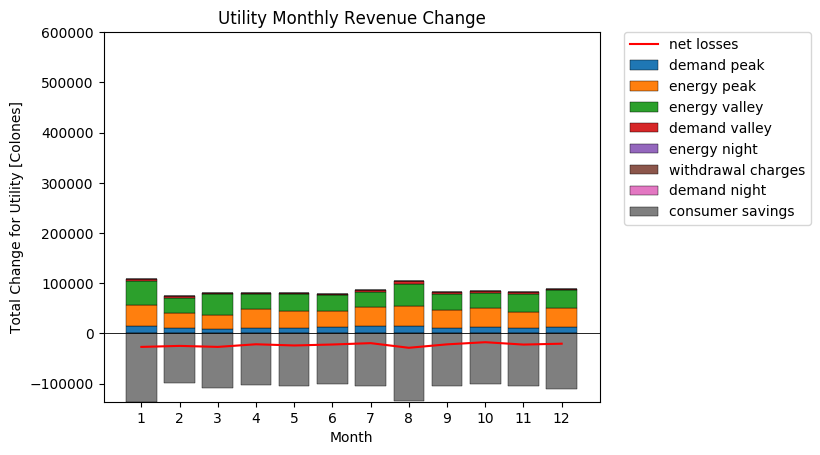

In [28]:
plot_utility_change(bills_commercial);

## Commercial case 2: medium PV system

In [29]:
PVComInd.capacity = 21.0
ts=simulate(cnfl_commercial, PVComInd, 3);

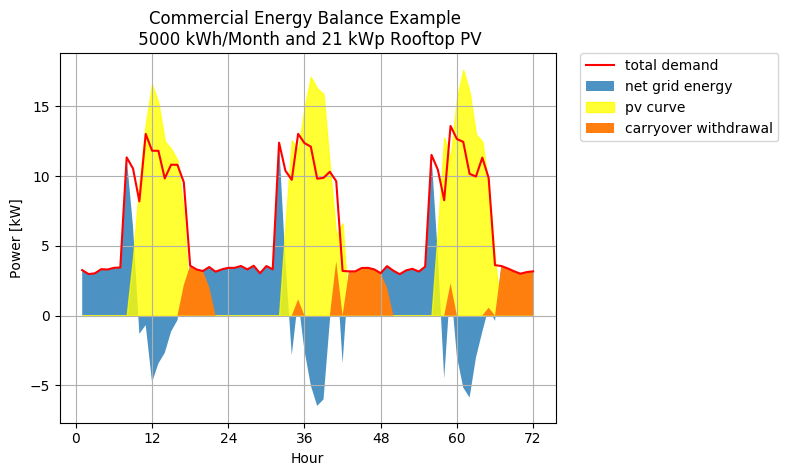

In [30]:
hours = 1:72
fill_between(hours, ts["injection_grid_h"], label = "net grid energy", alpha = 0.8)
fill_between(hours, ts["pv_curve"], label = "pv curve", alpha = 0.8, color="yellow")
fill_between(hours, ts["withdrawal_h"],  label = "carryover withdrawal")
plot(hours, ts["demand_curve"], label = "total demand", color = "red")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
xlabel("Hour")
ylabel("Power [kW]")
grid("on")
xticks([0,12,24,36,48,60,72]);
title("Commercial Energy Balance Example \n 5000 kWh/Month and 21 kWp Rooftop PV");

In [31]:
ebalance = annual_energy_balance(cnfl_commercial, PVComInd, print_output=true);

month consumer_energy PV_energy injection_grid grid_energy global_allowance allowance withdrawn_energy utility_supplied_energy carryover peak_power peak_demand
1 4969.4 3316.78 372.14 2024.77 1625.22 372.14 372.14 1652.62 0.0 14.71 8.85
2 5115.66 2096.39 35.88 3055.16 2280.31 35.88 35.88 3019.28 0.0 16.85 13.61
3 4857.78 2247.84 147.28 2757.22 3345.87 147.28 147.28 2609.94 0.0 14.32 11.76
4 5002.92 2116.36 71.59 2958.14 4235.6 71.59 71.59 2886.56 0.0 15.33 12.1
5 5389.4 2559.87 222.34 3051.87 5418.36 222.34 222.34 2829.53 0.0 15.94 12.99
6 5190.58 2449.79 79.66 2820.45 6396.41 79.66 79.66 2740.79 0.0 15.93 12.71
7 4977.0 2309.09 180.42 2848.33 7448.21 180.42 180.42 2667.91 0.0 14.77 11.99
8 4987.09 2766.51 197.43 2418.01 8623.38 197.43 197.43 2220.58 0.0 14.61 8.28
9 4916.18 2342.37 220.93 2794.73 9573.72 220.93 220.93 2573.8 0.0 15.14 12.25
10 4753.59 2528.01 327.13 2552.71 10591.51 327.13 327.13 2225.58 0.0 13.97 11.51
11 4949.99 2283.67 102.32 2768.64 11383.38 102.32 102.32 2666.33 

In [32]:
bills_commercial = Dict()
println("grid_cost"," ","withdrawn_energy_cost"," ", "demand_cost", " ", "total_cost", " | ", 
        "counterfactual_energy_cost", " ", "counterfactual_demand_cost", " ", "counterfactual_cost", " ", " | ", "savings")
for m in 1:12
    bills_commercial[m] = monthly_bill(ebalance[m], cnfl_commercial, print_output=true)
end

grid_cost withdrawn_energy_cost demand_cost total_cost | counterfactual_energy_cost counterfactual_demand_cost counterfactual_cost  | savings
176301.67 7826.2 0.0 218393.66  | 319135.09 147889.36 553353.16  | 334959.5
193897.85 754.56 136775.12 391036.69  | 328527.76 169435.82 589369.18  | 198332.49
278428.51 3097.36 0.0 332728.79  | 311966.52 144010.31 540284.22  | 207555.43
307937.76 1505.45 0.0 365469.16  | 321287.54 154132.04 563104.22  | 197635.06
301854.31 4675.83 130639.04 512363.71  | 346107.48 160256.21 599969.14  | 87605.43
292387.85 1675.24 0.0 347337.19  | 333339.33 160170.78 584521.8  | 237184.62
284612.71 3794.13 0.0 340944.48  | 319623.05 148450.65 554583.84  | 213639.36
236891.57 4151.9 0.0 285084.59  | 320271.0 146855.43 553532.27  | 268447.68
274573.25 4646.14 0.0 330213.76  | 315716.78 152168.09 554153.66  | 223939.9
237424.98 6879.45 0.0 289299.33  | 305275.44 140415.18 528115.08  | 238815.74
284443.84 2151.71 0.0 338586.34  | 317888.63 153219.79 557971.4  | 219385.

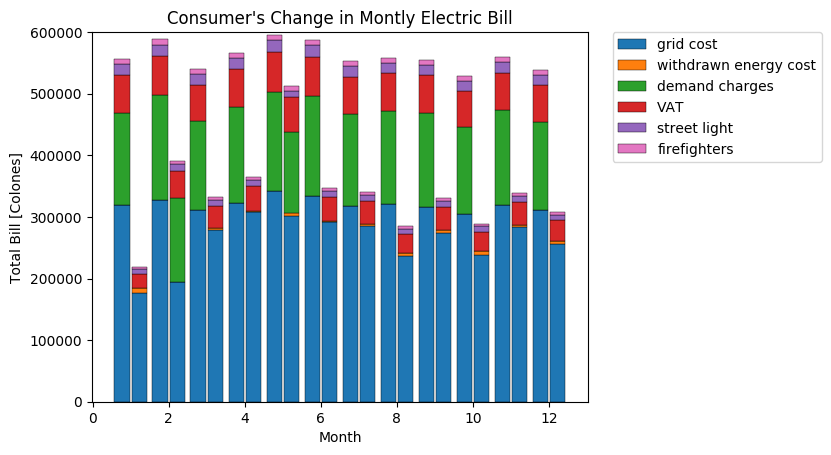

In [33]:
plot_bill(base_bills_commercial, bills_commercial, ["grid_cost", "withdrawn_energy_cost", "demand_charges", "VAT", "street_light", "firefighters"]);

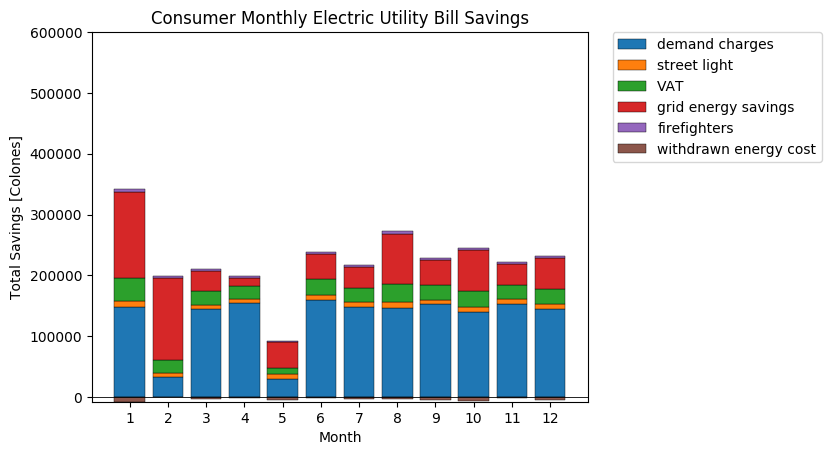

In [34]:
plot_savings(bills_commercial);

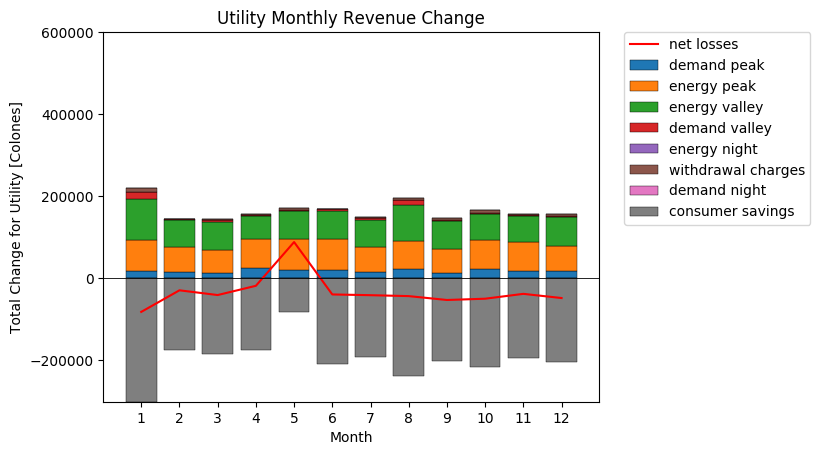

In [35]:
plot_utility_change(bills_commercial);

## Commercial case 3: Large PV system

In [36]:
PVComInd.capacity = 32.0
ts=simulate(cnfl_commercial, PVComInd, 3);

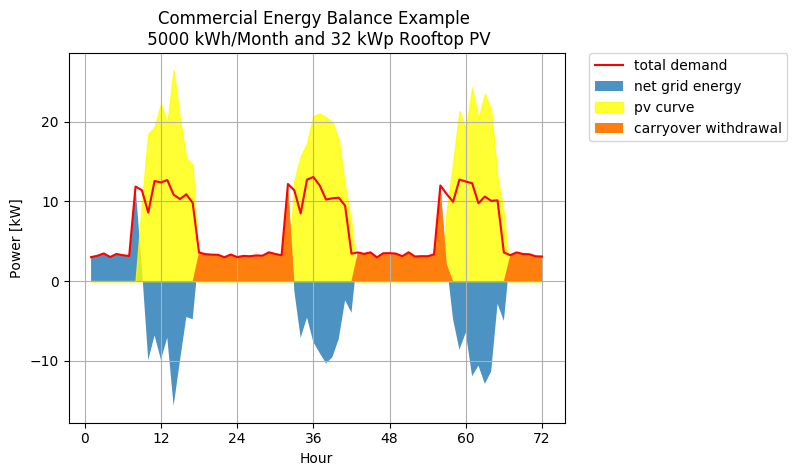

In [37]:
hours = 1:72
fill_between(hours, ts["injection_grid_h"], label = "net grid energy", alpha = 0.8)
fill_between(hours, ts["pv_curve"], label = "pv curve", alpha = 0.8, color="yellow")
fill_between(hours, ts["withdrawal_h"],  label = "carryover withdrawal")
plot(hours, ts["demand_curve"], label = "total demand", color = "red")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
xlabel("Hour")
ylabel("Power [kW]")
grid("on")
xticks([0,12,24,36,48,60,72]);
title("Commercial Energy Balance Example \n 5000 kWh/Month and 32 kWp Rooftop PV");

In [38]:
ebalance = annual_energy_balance(cnfl_commercial, PVComInd, print_output=true);

month consumer_energy PV_energy injection_grid grid_energy global_allowance allowance withdrawn_energy utility_supplied_energy carryover peak_power peak_demand
1 4997.21 5208.1 1915.73 1704.85 2551.97 1915.73 1704.85 0.0 210.88 14.89 7.09
2 5112.41 3167.26 693.9 2639.05 2399.07 904.78 904.78 1734.27 0.0 16.84 13.57
3 4858.64 3065.2 726.63 2520.07 2996.24 726.63 726.63 1793.44 0.0 14.47 11.67
4 5013.61 3818.13 979.54 2175.01 4140.5 979.54 979.54 1195.48 0.0 15.44 12.51
5 5362.79 3593.28 806.2 2575.72 4921.67 806.2 806.2 1769.51 0.0 15.97 12.99
6 5184.51 3728.7 837.13 2292.94 5942.53 837.13 837.13 1455.81 0.0 15.98 12.95
7 4955.09 3341.5 815.79 2429.38 6742.74 815.79 815.79 1613.59 0.0 14.68 12.03
8 5014.41 4123.66 1232.41 2123.17 7947.54 1232.41 1232.41 890.75 0.0 14.93 11.18
9 4899.02 3615.03 1106.87 2390.86 8486.49 1106.87 1106.87 1283.98 0.0 14.97 12.32
10 4754.05 3195.23 891.12 2449.94 8945.28 891.12 891.12 1558.81 0.0 14.15 11.5
11 4931.83 3800.35 905.5 2036.97 9916.34 905.5 905.5 

In [39]:
bills_commercial = Dict()
println("grid_cost"," ","withdrawn_energy_cost"," ", "total_energy_cost", " ", "total_demand_charges", " | ", 
        "counterfactual_energy_cost", " ", "counterfactual_demand_cost", " ", "counterfactual_cost", " ", " | ", "savings")
for m in 1:12
    bills_commercial[m] = monthly_bill(ebalance[m], cnfl_commercial, print_output=true)
end

grid_cost withdrawn_energy_cost total_energy_cost total_demand_charges | counterfactual_energy_cost counterfactual_demand_cost counterfactual_cost  | savings
1893.9 35853.0 0.0 47125.34  | 320921.08 149708.07 557587.17  | 510461.83
185011.75 19027.55 0.0 243398.16  | 328318.81 169272.75 588930.87  | 345532.72
191324.38 15280.96 0.0 245925.08  | 312022.0 145457.75 542011.85  | 296086.78
127533.3 20599.69 0.0 177616.91  | 321973.9 155210.3 565166.64  | 387549.73
188771.67 16954.44 0.0 245111.47  | 344398.59 160599.0 598308.14  | 353196.67
155305.83 17604.79 0.0 206463.14  | 332949.52 160610.55 584557.83  | 378094.69
172138.2 17155.96 0.0 225742.17  | 318215.9 147631.64 551952.42  | 326210.25
95025.74 25917.68 0.0 146234.89  | 322025.49 150142.99 559413.92  | 413179.03
136975.45 23277.56 0.0 192282.24  | 314614.85 150541.37 550962.31  | 358680.08
166294.23 18740.31 0.0 220926.4  | 305304.98 142268.39 530277.15  | 309350.75
120705.84 19042.64 0.0 167511.15  | 316722.16 150356.48 553283.47 

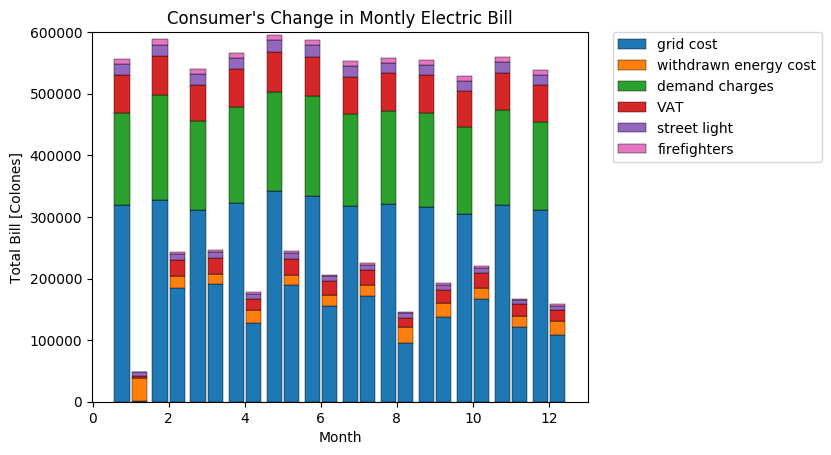

In [40]:
plot_bill(base_bills_commercial, bills_commercial, ["grid_cost", "withdrawn_energy_cost", "demand_charges", "VAT", "street_light", "firefighters"]);

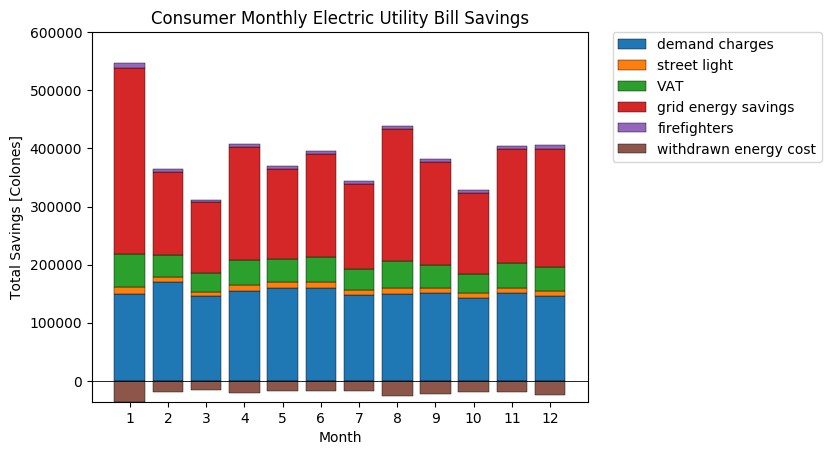

In [65]:
plot_savings(bills_commercial);

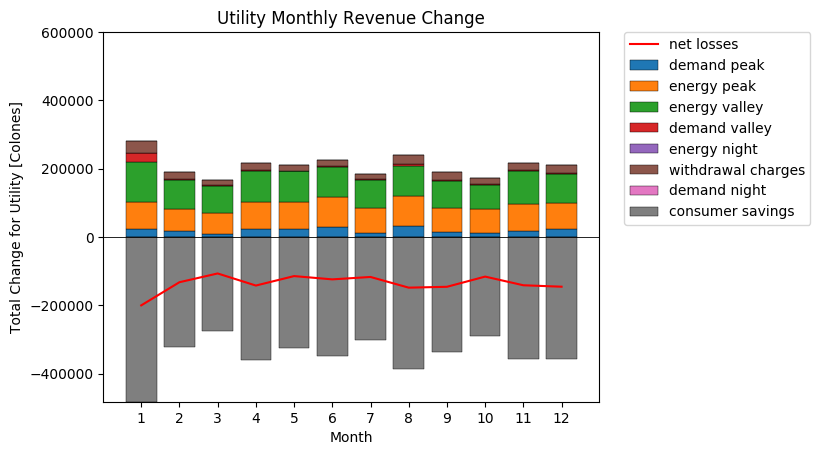

In [42]:
plot_utility_change(bills_commercial);

# Medium Voltage (TMT) cases, users are medium to large industrial consumers.

## TMT case 1: small PV system

In [43]:
PVTMT.capacity = 0.0
base_ebalance = annual_energy_balance(cnfl_mediumvoltage, PVTMT, print_output=false);
PVTMT.capacity = 30.0
ts=simulate(cnfl_mediumvoltage, PVTMT, 3);

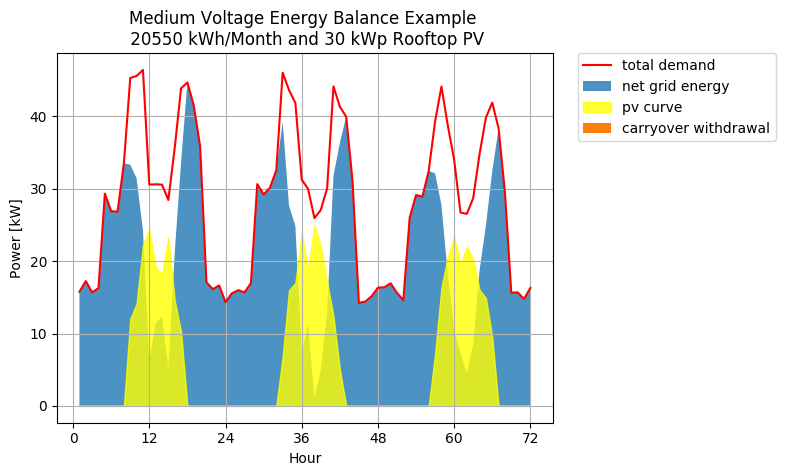

In [44]:
hours = 1:72
fill_between(hours, ts["injection_grid_h"], label = "net grid energy", alpha = 0.8)
fill_between(hours, ts["pv_curve"], label = "pv curve", alpha = 0.8, color="yellow")
fill_between(hours, ts["withdrawal_h"],  label = "carryover withdrawal")
plot(hours, ts["demand_curve"], label = "total demand", color = "red")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
xlabel("Hour")
ylabel("Power [kW]")
grid("on")
xticks([0,12,24,36,48,60,72]);
title("Medium Voltage Energy Balance Example \n 20550 kWh/Month and 30 kWp Rooftop PV");

In [45]:
ebalance = annual_energy_balance(cnfl_mediumvoltage, PVTMT, print_output=true);

month | consumer_energy_peak consumer_energy_valley consumer_energy_night  | PV_energy total_injection global_allowance withdrawn_energy  | grid_energy_peak grid_energy_valley grid_energy_night  | global_generation global_withdrawal carry_over  | peak_power_peak peak_power_valley peak_power_night  | peak_demand_peak peak_demand_valley peak_demand_night  | 
1 | 7597.88 7741.03 5772.91  | 4795.32 0.0 2349.71 0.0  | 5524.81 5018.78 5772.91  | 4795.32 0.0 0.0  | 46.46 46.37 35.79  | 46.41 31.03 35.79 
2 | 6964.57 7061.86 5309.31  | 2901.78 0.0 3771.58 0.0  | 5903.52 5221.12 5309.31  | 7697.11 0.0 0.0  | 47.28 46.19 36.36  | 47.28 46.19 36.36 
3 | 7535.03 7718.27 5779.7  | 3210.66 0.0 5344.8 0.0  | 6105.99 5936.66 5779.7  | 10907.77 0.0 0.0  | 46.62 46.54 35.5  | 46.62 46.54 35.5 
4 | 7865.09 8024.01 5995.74  | 3397.57 0.0 7009.61 0.0  | 6375.9 6115.62 5995.74  | 14305.34 0.0 0.0  | 49.79 49.8 38.17  | 49.79 38.23 38.17 
5 | 7642.54 7678.33 5771.96  | 3429.82 0.0 8690.23 0.0  | 5904.08 5986

In [46]:
bills_TMT= Dict(); base_bills_TMT= Dict()
println("grid_energy_cost_peak", " ",    
        "grid_energy_cost_valley", " ",
        "grid_energy_cost_night", " ", 
        " | ",
        "withdrawn_energy_cost", " ",       
        " | ",      
        "counterfactual_energy_cost_peak", " ",
        "counterfactual_energy_cost_valley"," ",
        "counterfactual_energy_cost_night"," ",        
         " | ",
        "grid_demand_cost_peak", " ",    
        "grid_demand_cost_valley", " ",
        "grid_demand_cost_night", " ", 
        " | ",  
        "counterfactual_demand_cost_peak", " ",
        "counterfactual_demand_cost_valley"," ",
        "counterfactual_demand_cost_night"," ",        
         " | ",
        "total_savings")
for m in 1:12
    bills_TMT[m] = monthly_bill(ebalance[m], cnfl_mediumvoltage, print_output=true)
    base_bills_TMT[m] = monthly_bill(base_ebalance[m], cnfl_mediumvoltage, print_output=true)
end

grid_energy_cost_peak grid_energy_cost_valley grid_energy_cost_night  | withdrawn_energy_cost  | counterfactual_energy_cost_peak counterfactual_energy_cost_valley counterfactual_energy_cost_night  | grid_demand_cost_peak grid_demand_cost_valley grid_demand_cost_night  | counterfactual_demand_cost_peak counterfactual_demand_cost_valley counterfactual_demand_cost_night  | total_savings
300660.18 136560.97 113091.36  | 0.0  | 413476.68 210633.48 113091.36  | 442855.01 210685.07 154271.05  | 443362.76 314868.41 154271.05  | 351419.75 
412859.26 209809.78 113104.57  | 0.0  | 412859.26 209809.78 113104.57  | 444567.48 314848.38 154707.65  | 444567.48 314848.38 154707.65  | 0.0 
321269.64 142066.71 104009.41  | 0.0  | 379011.85 192153.08 104009.41  | 451151.85 313623.48 156746.93  | 451151.85 313623.48 156746.93  | 133918.56 
377405.48 194494.05 103856.76  | 0.0  | 377405.48 194494.05 103856.76  | 451977.87 318280.9 157045.59  | 451977.87 318280.9 157045.59  | 0.0 
332287.79 161536.49 113224.

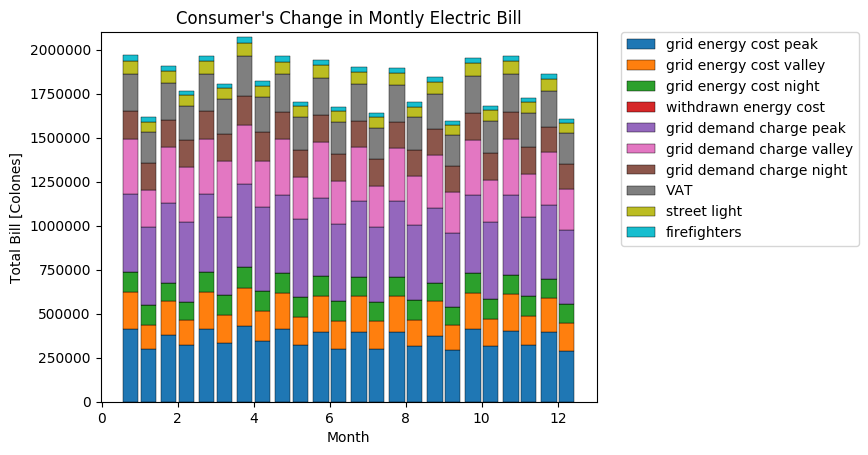

In [47]:
fields = ["grid_energy_cost_peak", 
        "grid_energy_cost_valley",
        "grid_energy_cost_night", 
        "withdrawn_energy_cost",      
        "grid_demand_charge_peak",    
        "grid_demand_charge_valley", 
        "grid_demand_charge_night",
        "VAT", "street_light", "firefighters"]
plot_bill(base_bills_TMT, bills_TMT, fields, 2);

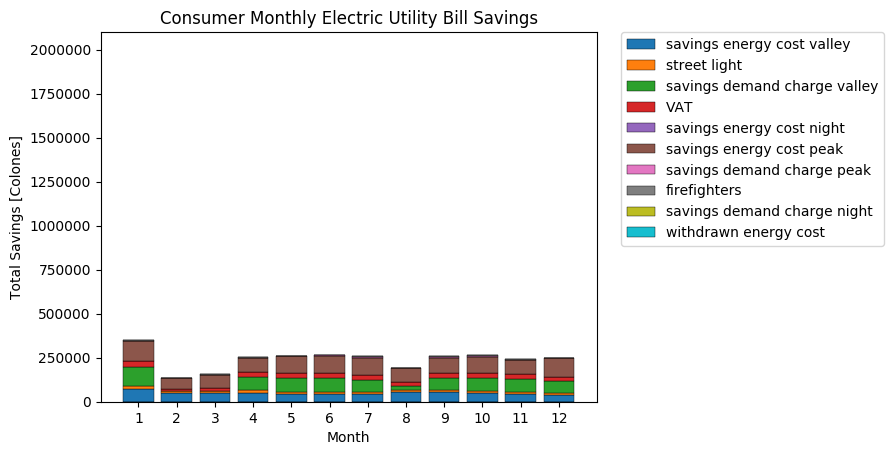

In [48]:
plot_savings(bills_TMT, 2);

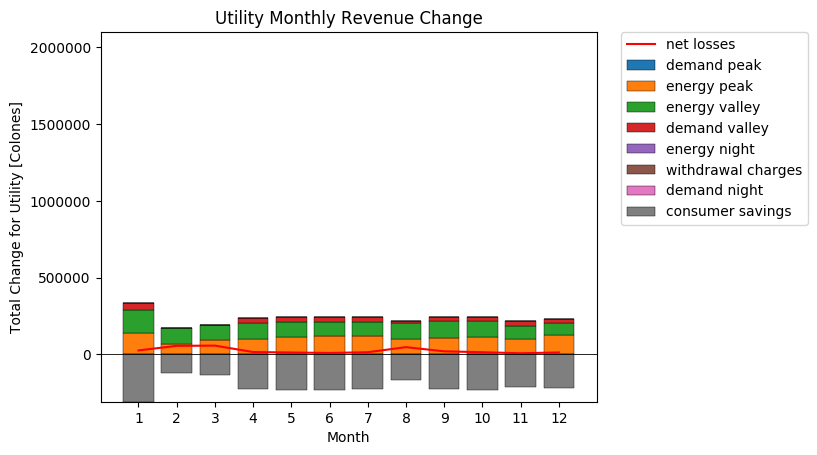

In [49]:
plot_utility_change(bills_TMT,2);

## TMT Case2: Medium PV System

In [50]:
PVTMT.capacity = 75
ts=simulate(cnfl_mediumvoltage, PVTMT, 3);

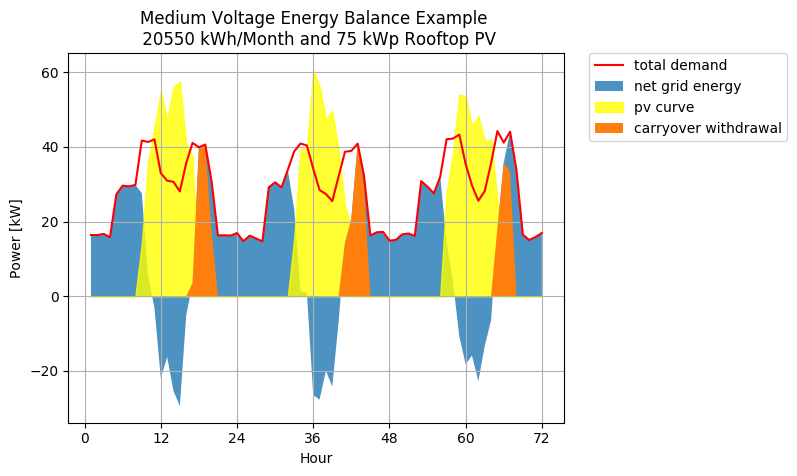

In [51]:
hours = 1:72
fill_between(hours, ts["injection_grid_h"], label = "net grid energy", alpha = 0.8)
fill_between(hours, ts["pv_curve"], label = "pv curve", alpha = 0.8, color="yellow")
fill_between(hours, ts["withdrawal_h"],  label = "carryover withdrawal")
plot(hours, ts["demand_curve"], label = "total demand", color = "red")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
xlabel("Hour")
ylabel("Power [kW]")
grid("on")
xticks([0,12,24,36,48,60,72]);
title("Medium Voltage Energy Balance Example \n 20550 kWh/Month and 75 kWp Rooftop PV");

In [52]:
ebalance = annual_energy_balance(cnfl_mediumvoltage, PVTMT, print_output=true);

month | consumer_energy_peak consumer_energy_valley consumer_energy_night  | PV_energy total_injection global_allowance withdrawn_energy  | grid_energy_peak grid_energy_valley grid_energy_night  | global_generation global_withdrawal carry_over  | peak_power_peak peak_power_valley peak_power_night  | peak_demand_peak peak_demand_valley peak_demand_night  | 
1 | 7590.53 7738.73 5760.02  | 12551.53 2868.76 6150.25 2868.76  | 3446.65 2199.85 5760.02  | 12551.53 2868.76 0.0  | 46.49 46.47 35.53  | 46.28 30.97 35.53 
2 | 6974.17 7046.43 5297.06  | 8022.14 1778.51 7212.33 1778.51  | 4221.76 3555.21 5297.06  | 20573.67 4647.27 0.0  | 47.23 47.38 36.06  | 47.04 47.38 36.06 
3 | 7575.43 7777.99 5787.96  | 9457.95 1884.31 10068.22 1884.31  | 3630.48 4149.3 5787.96  | 30031.62 6531.58 0.0  | 46.55 46.13 35.87  | 46.3 46.13 35.87 
4 | 7827.16 8004.37 5970.48  | 7465.92 370.21 11842.21 370.21  | 4151.15 4584.67 5970.48  | 37497.54 6901.8 0.0  | 49.86 49.87 38.39  | 49.78 38.16 38.39 
5 | 7552.41 770

In [53]:
bills_TMT= Dict()
println("grid_energy_cost_peak", " ",    
        "grid_energy_cost_valley", " ",
        "grid_energy_cost_night", " ", 
        " | ",
        "withdrawn_energy_cost", " ",       
        " | ",      
        "counterfactual_energy_cost_peak", " ",
        "counterfactual_energy_cost_valley"," ",
        "counterfactual_energy_cost_night"," ",        
         " | ",
        "grid_demand_cost_peak", " ",    
        "grid_demand_cost_valley", " ",
        "grid_demand_cost_night", " ", 
        " | ",  
        "counterfactual_demand_cost_peak", " ",
        "counterfactual_demand_cost_valley"," ",
        "counterfactual_demand_cost_night"," ",        
         " | ",
        "total_savings")
for m in 1:12
    bills_TMT[m] = monthly_bill(ebalance[m], cnfl_mediumvoltage, print_output=true)
end

grid_energy_cost_peak grid_energy_cost_valley grid_energy_cost_night  | withdrawn_energy_cost  | counterfactual_energy_cost_peak counterfactual_energy_cost_valley counterfactual_energy_cost_night  | grid_demand_cost_peak grid_demand_cost_valley grid_demand_cost_night  | counterfactual_demand_cost_peak counterfactual_demand_cost_valley counterfactual_demand_cost_night  | total_savings
128894.63 11134.85 112838.73  | 60330.12  | 413076.54 210570.96 112838.73  | 441624.21 210280.92 153170.62  | 443601.58 315544.33 153170.62  | 642768.14 
224097.58 51169.29 103769.36  | 37401.99  | 379534.39 191733.3 103769.36  | 448862.6 321685.85 155412.29  | 450687.23 321685.85 155412.29  | 320751.08 
195517.12 62657.25 113386.14  | 39627.11  | 412255.16 211639.14 113386.14  | 441850.66 313202.1 154621.1  | 444187.75 313202.1 154621.1  | 403456.78 
215309.78 119973.39 116961.76  | 7785.62  | 425954.01 217799.02 116961.76  | 474997.2 259101.13 165461.79  | 475817.66 338600.6 165461.79  | 462108.2 
158881

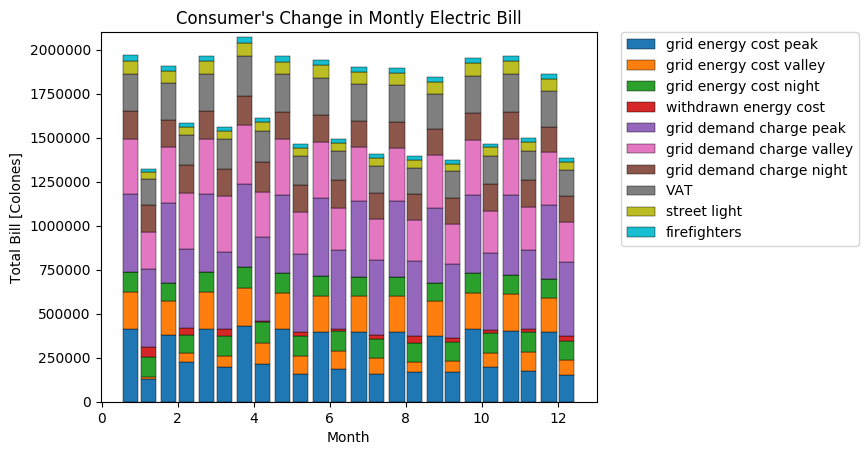

In [54]:
fields = ["grid_energy_cost_peak", 
        "grid_energy_cost_valley",
        "grid_energy_cost_night", 
        "withdrawn_energy_cost",      
        "grid_demand_charge_peak",    
        "grid_demand_charge_valley", 
        "grid_demand_charge_night",
        "VAT", "street_light", "firefighters"]
plot_bill(base_bills_TMT, bills_TMT, fields,2);

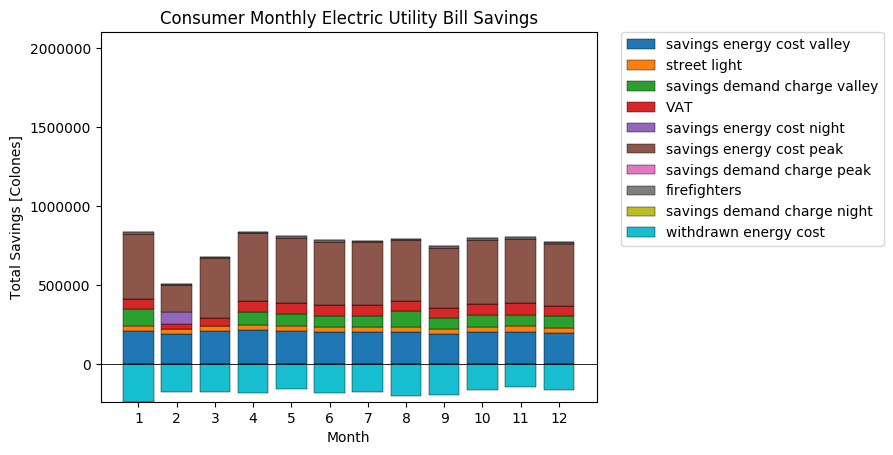

In [64]:
plot_savings(bills_TMT,2);

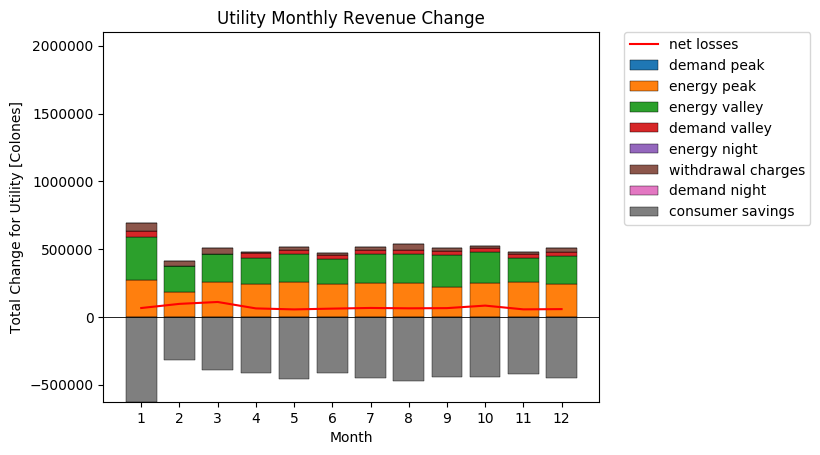

In [56]:
plot_utility_change(bills_TMT,2);

## TMT Case 3: Large PV System

In [57]:
PVTMT.capacity = 150
ts=simulate(cnfl_mediumvoltage, PVTMT, 3);

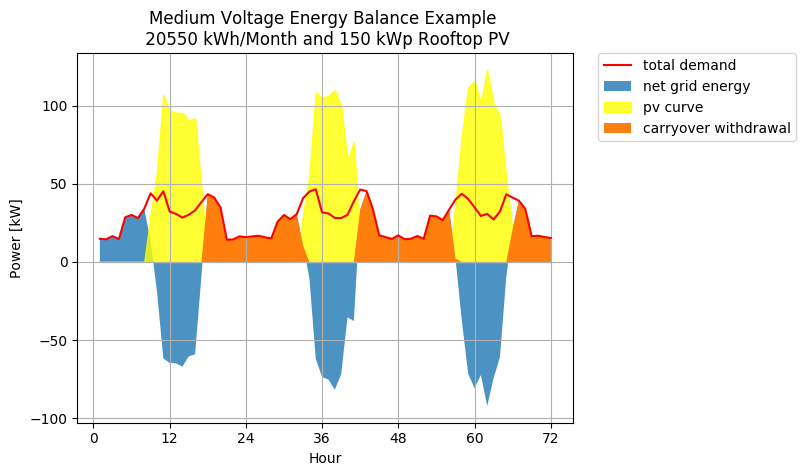

PyObject Text(0.5, 1, 'Medium Voltage Energy Balance Example \n 20550 kWh/Month and 150 kWp Rooftop PV')

In [58]:
hours = 1:72
fill_between(hours, ts["injection_grid_h"], label = "net grid energy", alpha = 0.8)
fill_between(hours, ts["pv_curve"], label = "pv curve", alpha = 0.8, color="yellow")
fill_between(hours, ts["withdrawal_h"],  label = "carryover withdrawal")
plot(hours, ts["demand_curve"], label = "total demand", color = "red")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
xlabel("Hour")
ylabel("Power [kW]")
grid("on")
xticks([0,12,24,36,48,60,72]);
title("Medium Voltage Energy Balance Example \n 20550 kWh/Month and 150 kWp Rooftop PV")

In [59]:
ebalance = annual_energy_balance(cnfl_mediumvoltage, PVTMT, print_output=true);

month | consumer_energy_peak consumer_energy_valley consumer_energy_night  | PV_energy total_injection global_allowance withdrawn_energy  | grid_energy_peak grid_energy_valley grid_energy_night  | global_generation global_withdrawal carry_over  | peak_power_peak peak_power_valley peak_power_night  | peak_demand_peak peak_demand_valley peak_demand_night  | 
1 | 7597.98 7684.18 5787.99  | 24600.75 14728.44 12054.37 11197.83  | 3530.88 1878.97 5787.99  | 24600.75 11197.83 856.53  | 46.58 46.51 35.39  | 46.53 31.03 35.39 
2 | 6969.61 7077.97 5274.38  | 15973.78 7535.98 8683.69 8392.51  | 2498.36 3111.42 5274.38  | 40574.53 19590.34 0.0  | 47.38 47.31 36.4  | 46.9 47.31 36.4 
3 | 7574.08 7703.2 5779.08  | 17595.09 8413.19 8912.77 8413.19  | 3025.28 3070.1 5779.08  | 58169.62 28003.53 0.0  | 46.41 46.6 35.91  | 46.41 46.6 35.91 
4 | 7869.77 7933.87 5985.88  | 18483.66 8444.38 9556.57 8444.38  | 2919.42 2844.93 5985.88  | 76653.28 36447.91 0.0  | 49.85 49.32 38.31  | 49.77 37.92 38.31 
5 | 75

In [60]:
bills_TMT= Dict()
println("grid_energy_cost_peak", " ",    
        "grid_energy_cost_valley", " ",
        "grid_energy_cost_night", " ", 
        " | ",
        "withdrawn_energy_cost", " ",       
        " | ",      
        "counterfactual_energy_cost_peak", " ",
        "counterfactual_energy_cost_valley"," ",
        "counterfactual_energy_cost_night"," ",        
         " | ",
        "grid_demand_cost_peak", " ",    
        "grid_demand_cost_valley", " ",
        "grid_demand_cost_night", " ", 
        " | ",  
        "counterfactual_demand_cost_peak", " ",
        "counterfactual_demand_cost_valley"," ",
        "counterfactual_demand_cost_night"," ",        
         " | ",
        "savings")
for m in 1:12
    bills_TMT[m] = monthly_bill(ebalance[m], cnfl_mediumvoltage, print_output=true)
end

grid_energy_cost_peak grid_energy_cost_valley grid_energy_cost_night  | withdrawn_energy_cost  | counterfactual_energy_cost_peak counterfactual_energy_cost_valley counterfactual_energy_cost_night  | grid_demand_cost_peak grid_demand_cost_valley grid_demand_cost_night  | counterfactual_demand_cost_peak counterfactual_demand_cost_valley counterfactual_demand_cost_night  | savings
0.0 0.0 113386.67  | 235490.39  | 413481.83 209086.46 113386.67  | 443995.71 210717.25 152566.55  | 444504.36 315790.79 152566.55  | 599979.26 
209540.5 0.0 29963.38  | 176494.52  | 379286.36 192591.48 103325.03  | 447604.38 321263.82 156909.15  | 452128.42 321263.82 156909.15  | 332245.16 
33139.37 0.0 113212.24  | 176929.42  | 412181.58 209603.99 113212.24  | 442917.97 316424.16 154777.29  | 442917.97 316424.16 154777.29  | 504673.47 
0.0 0.0 117263.34  | 177585.23  | 428273.14 215880.58 117263.34  | 474930.97 257480.15 165150.06  | 475698.1 334864.66 165150.06  | 660304.24 
0.0 0.0 112573.19  | 155945.24  | 4

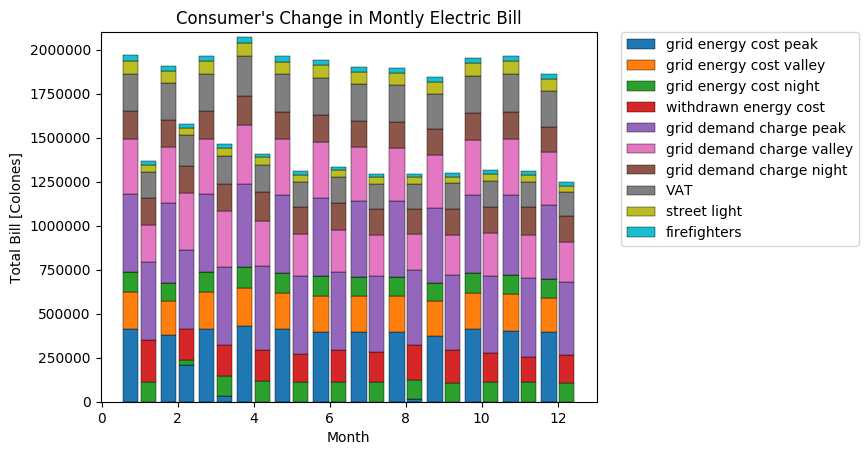

In [61]:
fields = ["grid_energy_cost_peak", 
        "grid_energy_cost_valley",
        "grid_energy_cost_night", 
        "withdrawn_energy_cost",      
        "grid_demand_charge_peak",    
        "grid_demand_charge_valley", 
        "grid_demand_charge_night",
        "VAT", "street_light", "firefighters"]
plot_bill(base_bills_TMT, bills_TMT, fields,2);

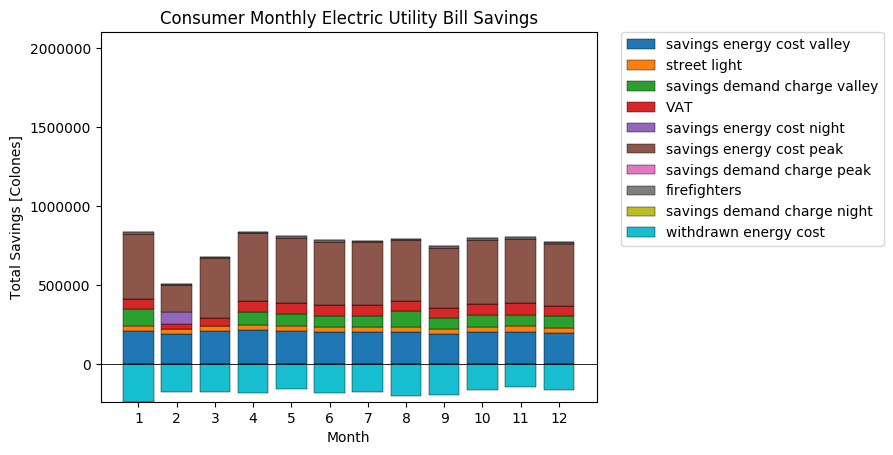

In [62]:
plot_savings(bills_TMT,2);

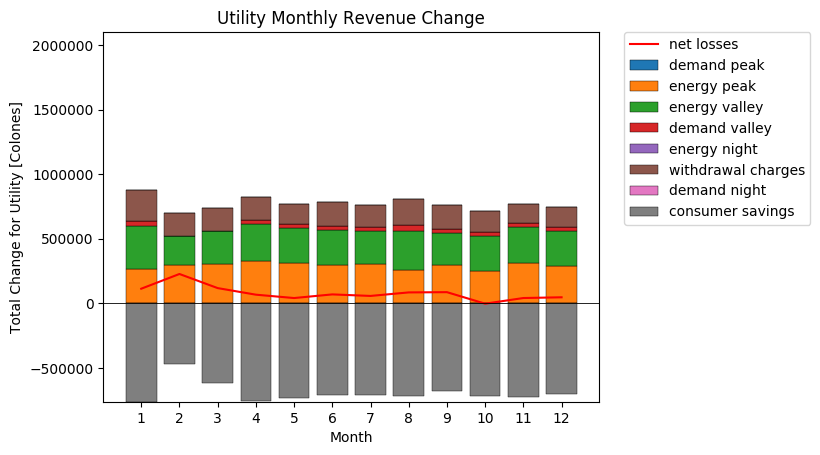

In [63]:
plot_utility_change(bills_TMT,2);